# **Predicting DoorDash Delivery ETA Model**
**by: Max Fukuhara, Jason Tran, Thomas McConnell, Michael Co, Dylan Chan**

**Motivation:**

*   As third and fourth-year college students, moving into off-campus housing meant cooking our own food but we all have days that we get lazy.
*    What's worse than being lazy and not having food? Ordering from DoorDash and it being late!


**About:**

*   We will be using various machine learning methods to analyze, understand, and predict future DoorDash Delivery ETA times.

**Time Features:**
*   market_id: A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id
*   created_at: Timestamp in UTC when the order was submitted by the consumer to DoorDash. (Note this timestamp is in UTC, but in case you need it, the actual timezone of the region was US/Pacific)
*   actual_delivery_time: Timestamp in UTC when the order was delivered to the consumer

**Store Features:**
*   store_id: an id representing the restaurant the order was submitted for
*   store_primary_category: cuisine category of the restaurant, e.g., italian, asian
*   order_protocol: a store can receive orders from DoorDash through many modes. This field represents an id denoting the protocol

**Orders:**
*   total_items: total number of items in the order
*   subtotal: total value of the order submitted (in cents)
*   num_distinct_items: number of distinct items included in the order
*   min_item_price: price of the item with the least cost in the order (in cents)
*   max_item_price: price of the item with the highest cost in the order (in cents)


**Market Features**:
*   total_onshift_dashers: Number of available dashers who are within 10 miles of the store at the time of order creation
*   total_busy_dashers: Subset of above total_onshift_dashers who are currently working on an order
*   total_outstanding_orders: Number of orders within 10 miles of this order that are currently being processed.



**Predictions from Other Models**:
*   estimated_order_place_duration: Estimated time for the restaurant to receive the order from DoorDash (in seconds)
*   estimated_store_to_consumer_driving_duration: Estimated travel time between store and consumer (in seconds)

# **Check-In #1**

## **1.1 Data Cleaning and Pre-Processing:**

**Importing Data:**

In [1]:
# import our data set
from datascience import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
url = 'https://drive.google.com/file/d/1kJdaBIFIngrKF9ldBYteI6ekTMjAGBCB/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

First, let's verify the column names are same as data features mentioned in our about section above.

In [2]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

Next, we verify the shape of our data frame.

In [3]:
df.shape

(197428, 16)

Note that there are NaN values for some categories as well as values that do not make sense. We must do something about these values to properly begin with our data set.

In [4]:
# random sample of 20 rows
df.sample(20)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
83826,6.0,2015-02-06 02:28:36,2015-02-06 03:02:07,1561,thai,3.0,4,3600,4,200,1300,NaN,NaN,NaN,251,433.0
95770,6.0,2015-02-10 02:12:11,2015-02-10 03:13:30,6965,dessert,5.0,1,475,1,475,475,NaN,NaN,NaN,251,719.0
31394,2.0,2015-02-10 00:54:45,2015-02-10 01:27:31,3995,dessert,2.0,1,1540,1,1540,1540,21.0,21.0,22.0,251,768.0
154761,6.0,2015-02-14 04:01:58,2015-02-14 04:50:57,4360,pizza,3.0,2,2428,2,1149,1279,NaN,NaN,NaN,251,772.0
134983,3.0,2015-02-02 19:33:54,2015-02-02 20:06:48,3019,sushi,5.0,6,6297,5,999,999,34.0,31.0,31.0,251,569.0
52384,1.0,2015-01-24 01:03:45,2015-01-24 01:35:49,2363,hawaiian,1.0,3,2900,2,900,1100,37.0,28.0,28.0,446,567.0
72935,4.0,2015-02-08 04:47:24,2015-02-08 05:27:45,1244,thai,5.0,4,4547,4,899,1399,63.0,65.0,92.0,251,397.0
68818,3.0,2015-02-05 20:41:58,2015-02-05 21:47:21,3415,sandwich,5.0,2,1225,2,325,520,25.0,23.0,25.0,251,468.0
108464,4.0,2015-02-02 00:23:46,2015-02-02 00:40:33,6380,breakfast,2.0,1,4200,1,4200,4200,27.0,19.0,20.0,251,712.0
134756,2.0,2015-02-13 23:52:35,2015-02-14 00:23:43,3019,sandwich,5.0,1,999,1,999,999,16.0,16.0,24.0,251,502.0


**Finding Invalid Values:**


Let's first look at numerical data values.

In [5]:
df.select_dtypes('number').describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


Next, let's look at other NA values.

In [6]:
print(df.isnull().sum())

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64


From this, there seems that there are some data values that intuitively do not make sense.

*  subtotal min is 0: could this mean that an order was discounted and free?
*  min_item_price min: -86 does not make sense... how could it be negative?
*  total_onshift_dashers min: -4 dashers does not make sense...
*  total_busy_dashers min: -5 dashers does not make sense...
*  total_outstanding_orders min: -6 orders does not make sense...
*  story_primary_category: there are NaN values for some categories

**Cleaning Invalid Values:**


We must now identify what to do with these invalid data values. Our choices would be to:
*   entirely remove entries that are negative (we must make sure we are not removing too many to make the data set very small)
*   replace with mean values
*   create our own category for NaN categorical values

In [7]:
df = df[df['min_item_price'] >= 0]
df = df[df['total_onshift_dashers'] >= 0]
df = df[df['total_busy_dashers'] >= 0]
df = df[df['total_outstanding_orders'] >= 0]
df = df.dropna()

In [8]:
# verify that there are no more negative values
df.select_dtypes('number').describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000
mean,2.744079,3556.498455,2.911860,3.204455,2697.182364,2.675041,684.980465,1160.195911,44.937127,41.878750,58.256337,307.800594,546.071821
std,1.330938,2055.948037,1.513078,2.672065,1828.680633,1.625620,519.802241,560.798759,34.542696,32.166493,52.730698,89.789257,218.712971
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1703.000000,1.000000,2.000000,1412.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,251.000000,383.500000
50%,2.000000,3620.000000,3.000000,3.000000,2224.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,251.000000,544.000000
75%,4.000000,5341.000000,4.000000,4.000000,3410.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,446.000000,703.000000
max,6.000000,6987.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


**Checking:** We must verify that there are not negative values and that there are no more entries with NaN.

In [9]:
remaining_negative_check = (df.select_dtypes(include=['number']) < 0).sum().sum() == 0
remaining_nan_check = df.isna().sum().sum() == 0

remaining_negative_check, remaining_nan_check

(True, True)

**Sanity Check:** We must make sure our data set did not shrink significantly.

In [10]:
df.shape

(175687, 16)

**Formatting:** We must also ensure that the categorical column is modified to numerical for easier integration for our Machine Learning model. Specifically, our column is 'store_primary_category'. Rather than creating an encoding for each of the categories (i.e. chinese=1, japanese=2, etc.), we opted to create a boolean one-hot encoding for each category. Although this will add 73 new columns, this will ultimately be more accurate as simply giving each category a numerical label implies a linear/hierarchical relationship between the different categories, which does not make sense.

In [11]:
num_unique_categories = df['store_primary_category'].nunique()
print(num_unique_categories)

'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['store_primary_category_encoded'] = le.fit_transform(df['store_primary_category'])
print(dict(zip(le.classes_, le.transform(le.classes_))))
'''

store_categories = df['store_primary_category']
df = pd.get_dummies(df, columns=['store_primary_category'], dtype='float')
df['store_primary_category'] = store_categories
df.sample(2)

73


,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,...,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese,store_primary_category
158822,2.0,2015-01-24 19:44:22,2015-01-24 20:26:23,314,5.0,7,4845,4,50,1199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mexican
26081,4.0,2015-02-13 20:23:47,2015-02-13 21:12:26,385,2.0,1,1850,1,1350,1350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,burger


## **1.2 Exploratory Data Analysis:**

**Determining Predictor for Response Variable:**

First, we must create our target value column which is the delivery time.

In [12]:
# create target value  'delivery_time_seconds'
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['delivery_time_seconds'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()

Next, we create do a correlational matrix in order to visualize which categories have the most impact on our target variable.

In [13]:
# select only numerical columns for correlation analysis
numeric_cols = df.select_dtypes(include=['number'])
# calculate the correlation matrix
correlation_matrix = numeric_cols.corr()
# focus on correlations with 'delivery_time_seconds'
correlation_with_delivery_time = correlation_matrix['delivery_time_seconds'].abs().sort_values(ascending=False)
pd.set_option('display.max_rows', None)
print(correlation_with_delivery_time)
pd.reset_option('display.max_rows')

delivery_time_seconds                           1.000000
estimated_store_to_consumer_driving_duration    0.158314
subtotal                                        0.143534
total_outstanding_orders                        0.122145
num_distinct_items                              0.105850
max_item_price                                  0.089323
total_items                                     0.077425
estimated_order_place_duration                  0.068652
total_busy_dashers                              0.060964
total_onshift_dashers                           0.047433
order_protocol                                  0.047000
store_primary_category_mexican                  0.038753
market_id                                       0.037958
store_primary_category_japanese                 0.037703
store_primary_category_pizza                    0.032896
store_primary_category_sandwich                 0.030756
store_primary_category_fast                     0.028206
store_primary_category_indian  

Finally, let's visualize this as a heatmap to see each correlation.

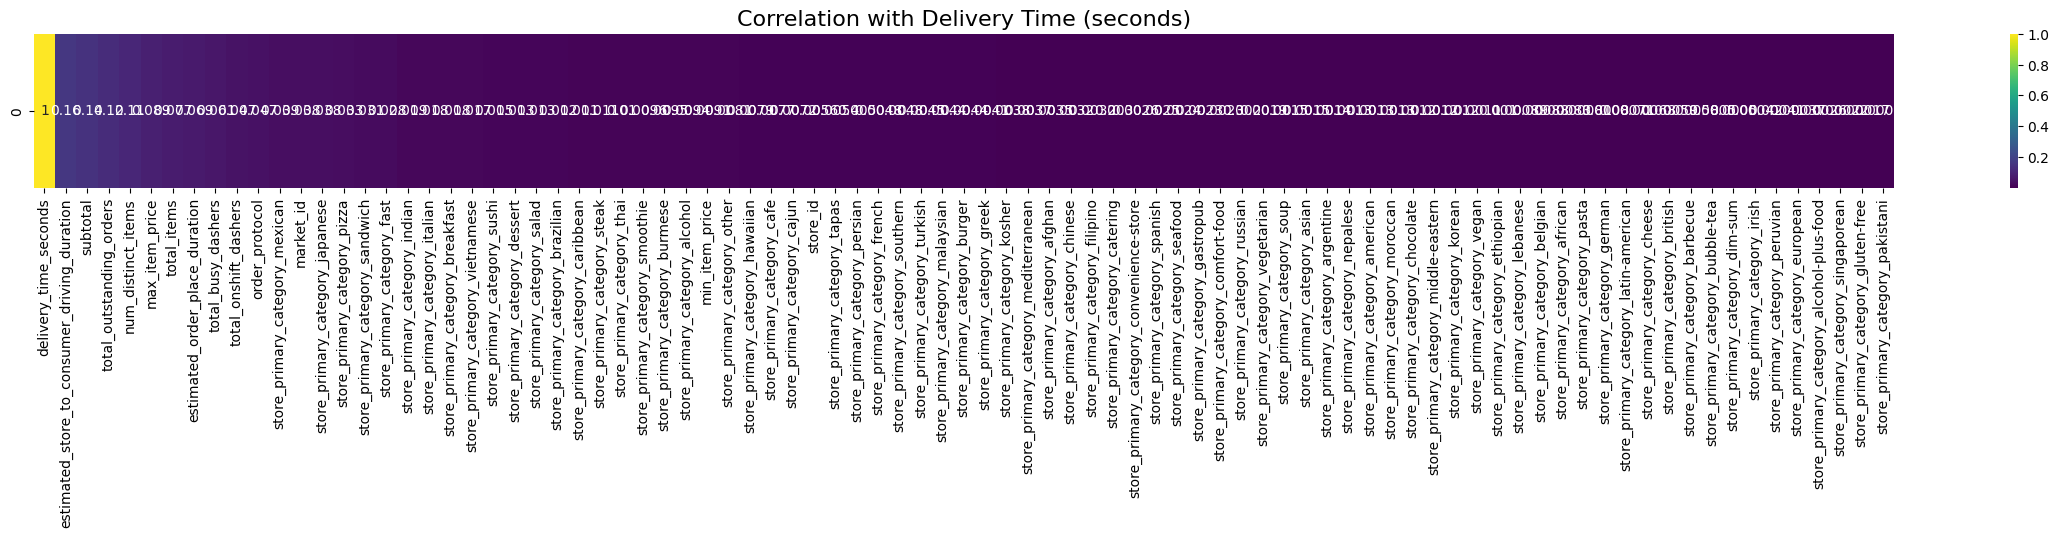

In [14]:
'''
plt.figure(figsize=(10, 20))
sns.heatmap(correlation_matrix[['delivery_time_seconds']], annot=True, cmap='coolwarm', linewidths=0.5)
'''
# Reshape the Series into a DataFrame (2D array) for the heatmap
data_reshaped = correlation_with_delivery_time.values.reshape(1, -1)  # Single column
# Create a DataFrame from the reshaped data
df_heatmap = pd.DataFrame(data_reshaped, columns=correlation_with_delivery_time.index)
# Create a heatmap
plt.figure(figsize=(30, 2))  # Optional: Adjust the size of the figure
sns.heatmap(df_heatmap, annot=True, cmap='viridis', cbar=True)
plt.title('Correlation with Delivery Time (seconds)', fontsize=16)
plt.show()

This heatmap doesn't immediately tell us much. Let's try to visualize this as bar graph as well.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86],
 [Text(0, 0, 'delivery_time_seconds'),
  Text(1, 0, 'estimated_store_to_consumer_driving_duration'),
  Text(2, 0, 'subtotal'),
  Text(3, 0, 'total_outstanding_orders'),
  Text(4, 0, 'num_distinct_items'),
  Text(5, 0, 'max_item_price'),
  Text(6, 0, 'total_items'),
  Text(7, 0, 'estimated_order_place_duration'),
  Text(8, 0, 'total_busy_dashers'),
  Text(9, 0, 'total_onshift_dashers'),
  Text(10, 0, 'order_protocol'),
  Text(11, 0, 'store_primary_category_mexican'),
  Text(12, 0, 'm

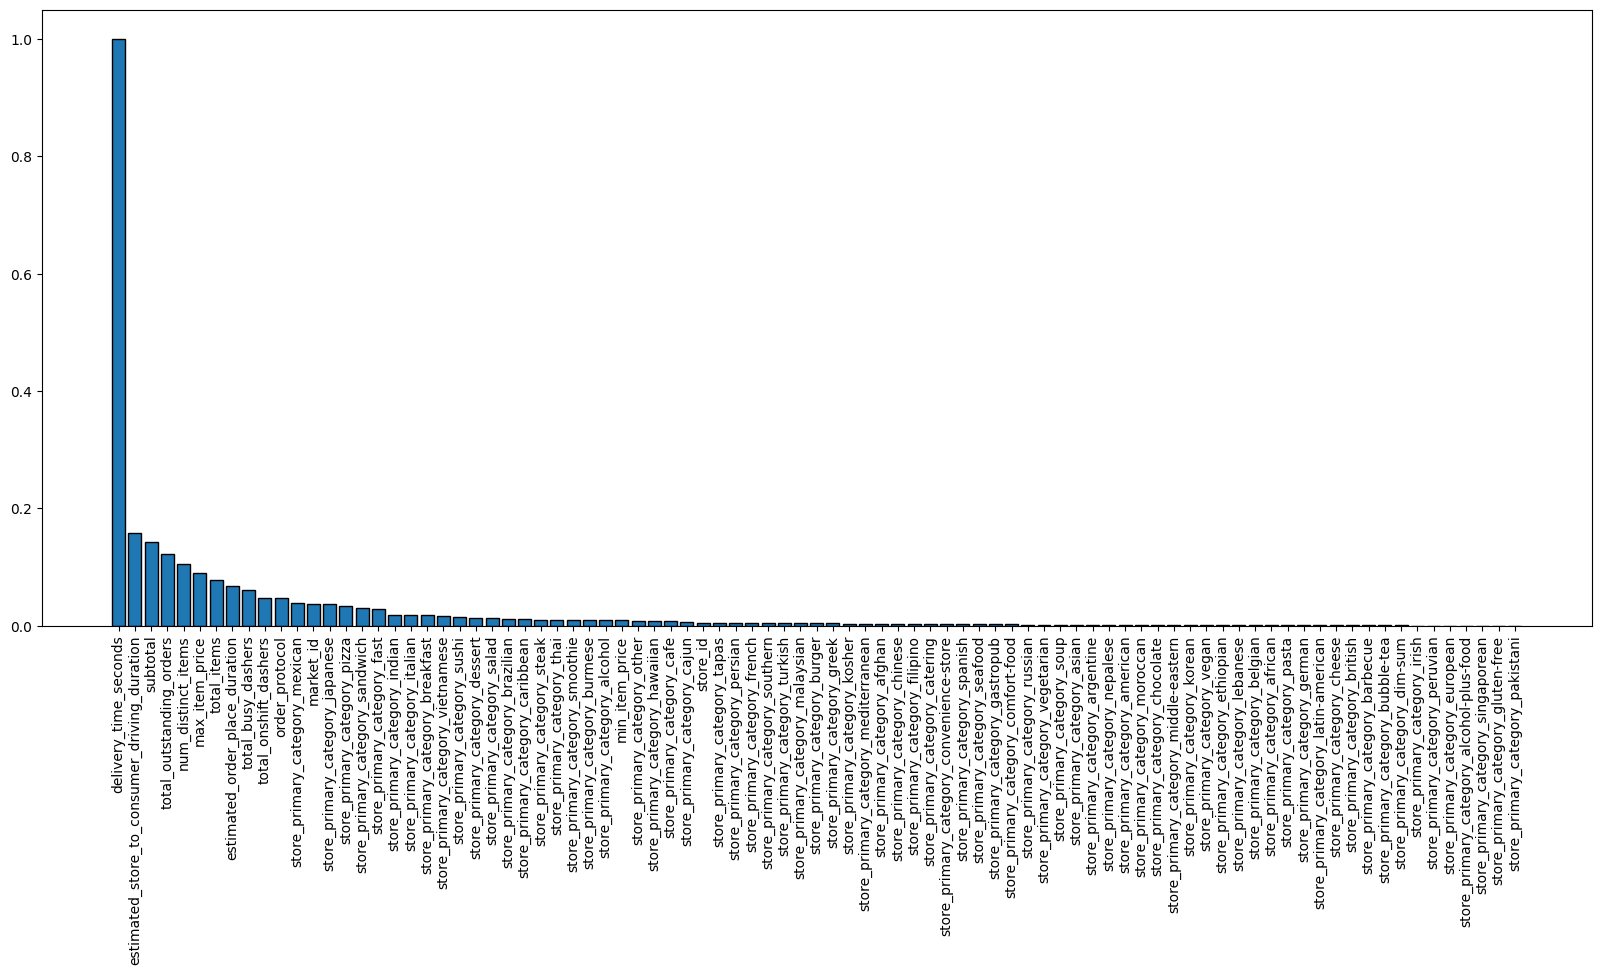

In [15]:
plt.figure(figsize=(20,8))
plt.bar(correlation_with_delivery_time.index.tolist(),correlation_with_delivery_time)
plt.xticks(rotation=90)

**Notes:**

The correlation values are all relatively low, indicating that these features have a weak relationship with delivery time. However, there are some takeaways.
*   estimated_store_to_consumer_driving_duration has the strongest correlation, meaning that the farther the store is to the customer, delivery time tends to increase.
*   Features like store_id, sore_primary_category_encoded, and min_item_price have almost no correlation with delivery time, implying they may not be significant predictors in a linear model.

# **Check-In #2**

## **2.1 Regression Model**

First, let's determine which variables will be our predictors. Looking at the top four predictors, we have the following variables:
1. estimated_store_to_consumer_driving_duration
2. subtotal
3. total_outstanding_orders
4. num_distinct_items

Thinking logically, all of these variables make the most sense to make an impact on a longer delivery time: the farther the store is, the longer it takes to deliver; the more food you have to make, the longer it takes to cook/prepare; and the more orders you have in general, the higher the chance the store has other orders and also the more traffic will be worse. This shows we are onto the right track.

However, since all the correlation values are so low, it is hard to determine where to draw the cutoff of which / how many variables we should include as our predictors, and which we should exclude. Hence, when we split the data, we will use the validation set to determine the hyperparameter of how many of the top correlated variables to use in our model. We will set a cap of for this hyper parameter to be 43 (half of the total variables) to preemptively prevent overfitting and also prevent the code from taking too much time.

First, let's save the potential predictor variables in order of highest to lowest correlation to response variable.

In [16]:
best_cols_ranked = correlation_with_delivery_time.index.tolist()
best_cols_ranked.remove('delivery_time_seconds')

Now let's randomly split the data into 80% testing/validation data and 20% testing data.

In [17]:
from sklearn.model_selection import train_test_split

X = numeric_cols.drop(columns=['delivery_time_seconds'])
y = df['delivery_time_seconds']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now it's time to implement 10-fold Cross Validation on the train_val data set to determine best hyperparameter.

In [18]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=10, shuffle=True, random_state=42)

**Note:** the below cell may take a few minutes to finish running

In [19]:
# keep track of data from each fold that we do
best_num_predictors_per_fold = []
best_mse_per_fold = []
all_mse_per_fold = []

# loop over each fold
for train_indexes, val_indexes in kf.split(X_train_val):
  # store the corresponding folds for each iteration
  X_train_fold, X_val_fold = X_train_val.iloc[train_indexes], X_train_val.iloc[val_indexes]
  y_train_fold, y_val_fold = y_train_val.iloc[train_indexes], y_train_val.iloc[val_indexes]

  best_num_predictors = 0
  best_val_mse = float('inf')
  all_mse = []

  # Make models for different hyperparameter values (# of predictors) and see what is the best
  for num_predictors in range(1,len(best_cols_ranked)//2 + 1):
    selected_predictors = best_cols_ranked[:num_predictors]
    # create a linear regression model
    model = LinearRegression()
    model.fit(X_train_fold[selected_predictors], y_train_fold)
    # predict on the validation fold
    y_val_pred = model.predict(X_val_fold[selected_predictors])
    # calculate validation MSE
    val_mse = mean_squared_error(y_val_fold, y_val_pred)
    all_mse.append(val_mse)

    if val_mse < best_val_mse:
      best_num_predictors = num_predictors
      best_val_mse = val_mse

  # update the best num of predictors list
  best_num_predictors_per_fold.append(best_num_predictors)
  best_mse_per_fold.append(best_val_mse)
  all_mse_per_fold.append(all_mse)
  print(f"Progress: {len(best_num_predictors_per_fold)} out of 10 folds done.")

Progress: 1 out of 10 folds done.
Progress: 2 out of 10 folds done.
Progress: 3 out of 10 folds done.
Progress: 4 out of 10 folds done.
Progress: 5 out of 10 folds done.
Progress: 6 out of 10 folds done.
Progress: 7 out of 10 folds done.
Progress: 8 out of 10 folds done.
Progress: 9 out of 10 folds done.
Progress: 10 out of 10 folds done.


Let's quickly graph the results of our 10-fold CV training.

Text(0, 0.5, 'MSE (tens of millions)')

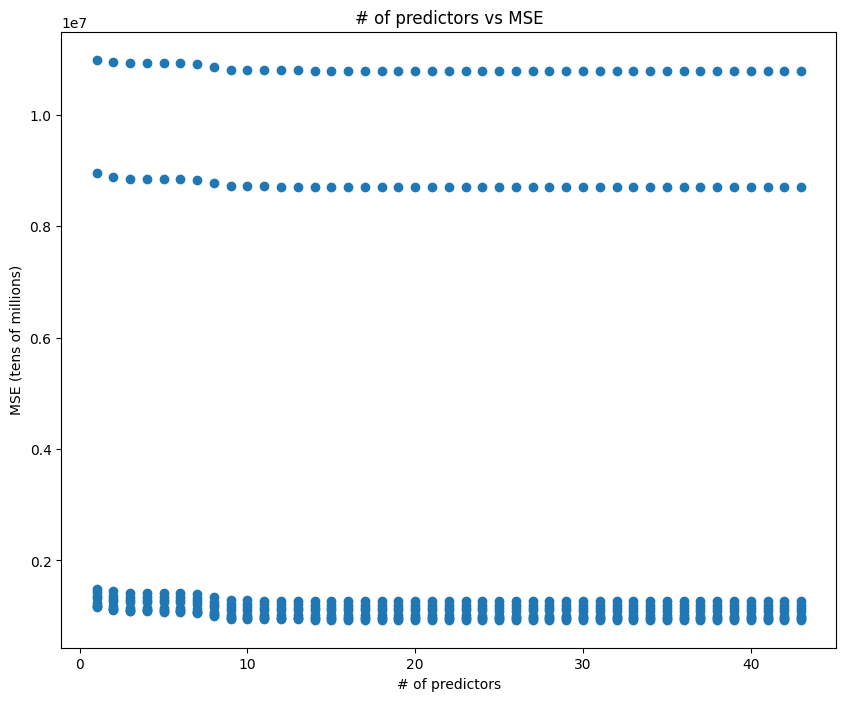

In [20]:
x_linreg_predictor_num = []
y_linreg_mse = []
for fold_data in all_mse_per_fold:
  for i, measured_mse in enumerate(fold_data):
    x_linreg_predictor_num.append(i+1)
    y_linreg_mse.append(measured_mse)

plt.figure(figsize=(10,8))
plt.scatter(x_linreg_predictor_num, y_linreg_mse)
plt.title("# of predictors vs MSE")
plt.xlabel("# of predictors")
plt.ylabel("MSE (tens of millions)")

Now that we have the best number of predictors to use per fold, we can average those numbers to get a final answer for our hyperparameter. Then we can make our final model and compare it to the test set.

In [21]:
#print(num_predictors_per_fold)
average_num_predictors = int(np.array(best_num_predictors_per_fold).mean().round())
print(f"{'Average best number of predictors to use: '.ljust(50, ' ')}{average_num_predictors}")
#total_mse = np.array(total_mse)
#print(total_mse)

final_predictors = best_cols_ranked[:average_num_predictors]
# train the final model
final_model = LinearRegression()
final_model.fit(X_train_val[final_predictors], y_train_val)
# predict on the test set
y_test_pred = final_model.predict(X_test[final_predictors])
test_mse = mean_squared_error(y_test, y_test_pred)

#print(mse_per_fold)
print(f"{'Average MSE in validation folds: '.ljust(50, ' ')}{np.array(all_mse_per_fold).mean()}")
print(f"{'Final MSE on test set: '.ljust(50, ' ')}{test_mse}")

Average best number of predictors to use:         42
Average MSE in validation folds:                  2836530.560242432
Final MSE on test set:                            1115290.7236849682


As we can see by looking at the MSE, running the model on the test data set actually shows an improvement compared to the average MSE on each of the cross-validation folds.

Unfortunately, our model likely suffers from underfitting. With an MSE of about 1.1M, that means the average error is about 1,056 seconds, or about 17.6 minutes, which is very large average error. However, this is not completely surprising as we saw in the EDA section, that none of the variables had a strong correlation with the response variable, delivery_time_seconds. Splitting up the store primaru category into separate columns seems to have helped the model since it was beneficial to add many predictors into the model, but it was not able to save the model from failure.

## **2.2 Regularization**

For are regularization model, we chose to use lasso regression, as lasso regression is better for data that contain potentially useless predictors, whereas ridge regression works better on data where most of the predictors are important.

Here we, will re-use the X_train_val, y_train_val, X_test, and y_test variables so that we can have a more accurate comparison between regression models.

In [22]:
import plotly.express as px
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, cross_validate

kf = KFold(n_splits=10, shuffle=True, random_state=42)

Note: the following code takes about 30 minutes to complete

In [23]:
alpha_range = np.logspace(-1,3,10)

# keep track of all fold data
best_alpha_per_fold = []
all_alpha_per_fold = []
best_mse_per_fold_lasso = []
all_mse_per_fold_lasso = []

#iterate through each fold
for train_indexes, test_indexes in kf.split(X_train_val):
  # store the corresponding folds for each iteration
  X_train_fold, X_val_fold = X_train_val.iloc[train_indexes], X_train_val.iloc[val_indexes]
  y_train_fold, y_val_fold = y_train_val.iloc[train_indexes], y_train_val.iloc[val_indexes]

  best_alpha = alpha_range[0]
  best_val_mse = float('inf')
  all_mse = []
  all_alpha = []

  # Make models for different hyperparameter values (# of predictors) and see what is the best
  for i,alpha in enumerate(alpha_range):
    print(f"Fold #{len(best_alpha_per_fold)+1}: testing alpha {i+1} out of 75 \r")
    # create a lasso regression model
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(X_train_fold, y_train_fold)
    # predict on the validation fold
    y_val_pred = model.predict(X_val_fold)
    # calculate validation MSE
    val_mse = mean_squared_error(y_val_fold, y_val_pred)
    all_alpha.append(alpha)
    all_mse.append(val_mse)

    if val_mse < best_val_mse:
      best_alpha = alpha
      best_val_mse = val_mse

  # update the fold data
  best_alpha_per_fold.append(best_alpha)
  all_alpha_per_fold.append(all_alpha)
  best_mse_per_fold_lasso.append(best_val_mse)
  all_mse_per_fold_lasso.append(all_mse)
  print(f"Progress: {len(best_alpha_per_fold)} out of 10 folds done.")

Fold #1: testing alpha 1 out of 75 
Fold #1: testing alpha 2 out of 75 
Fold #1: testing alpha 3 out of 75 
Fold #1: testing alpha 4 out of 75 
Fold #1: testing alpha 5 out of 75 
Fold #1: testing alpha 6 out of 75 
Fold #1: testing alpha 7 out of 75 
Fold #1: testing alpha 8 out of 75 
Fold #1: testing alpha 9 out of 75 
Fold #1: testing alpha 10 out of 75 
Progress: 1 out of 10 folds done.
Fold #2: testing alpha 1 out of 75 
Fold #2: testing alpha 2 out of 75 
Fold #2: testing alpha 3 out of 75 
Fold #2: testing alpha 4 out of 75 
Fold #2: testing alpha 5 out of 75 
Fold #2: testing alpha 6 out of 75 
Fold #2: testing alpha 7 out of 75 
Fold #2: testing alpha 8 out of 75 
Fold #2: testing alpha 9 out of 75 
Fold #2: testing alpha 10 out of 75 
Progress: 2 out of 10 folds done.
Fold #3: testing alpha 1 out of 75 
Fold #3: testing alpha 2 out of 75 
Fold #3: testing alpha 3 out of 75 
Fold #3: testing alpha 4 out of 75 
Fold #3: testing alpha 5 out of 75 
Fold #3: testing alpha 6 out o

In [24]:
print(best_alpha_per_fold)

[0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.27825594022071243]


Text(0, 0.5, 'MSE (millions)')

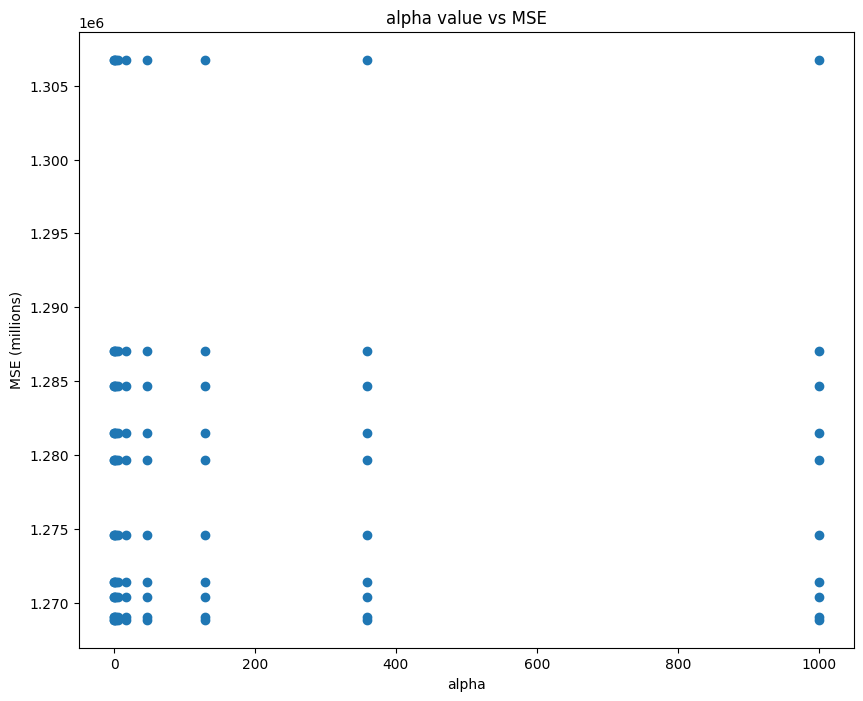

In [25]:
x_lassoreg_predictor_num = []
y_lassoreg_mse = []
for i in range(len(all_alpha_per_fold)):
  for j in range(len(all_alpha_per_fold[i])):
    x_lassoreg_predictor_num.append(all_alpha_per_fold[i][j])
    y_lassoreg_mse.append(all_mse_per_fold_lasso[i][i])

plt.figure(figsize=(10,8))
plt.scatter(x_lassoreg_predictor_num, y_lassoreg_mse)
plt.title("alpha value vs MSE")
plt.xlabel("alpha")
plt.ylabel("MSE (millions)")

In [26]:
#print(num_predictors_per_fold)
average_alpha = np.array(best_alpha_per_fold).mean()
print(f"{'Best alpha for Lasso Regression: '.ljust(50, ' ')}{average_alpha}")
#total_mse = np.array(total_mse)
#print(total_mse)

# train the final model
final_model = Lasso(alpha=average_alpha, max_iter=10000)
final_model.fit(X_train_val, y_train_val)
# predict on the test set
y_test_pred_lasso = final_model.predict(X_test)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)

#print(mse_per_fold)
print(f"{'Average MSE in validation folds: '.ljust(50, ' ')}{np.array(all_mse_per_fold_lasso).mean()}")
print(f"{'Final MSE on test set: '.ljust(50, ' ')}{test_mse_lasso}")

Best alpha for Lasso Regression:                  0.11782559402207124
Average MSE in validation folds:                  1279439.775216477
Final MSE on test set:                            1114574.5760990088


As we can see by looking at the MSE, running the model on the test data set actually shows an improvement compared to the average MSE on each of the cross-validation folds. We can also see the lasso regression model performs better than the linear regression model, but only by a small margin.

Unfortunately, our model still likely suffers from underfitting. With an MSE of about 1.1M, that means the average error is about 1,055.7 seconds, or about 17.5 minutes, which is very large average error. This model appear to only be about 1 second more accurate than the linear regression model. Again, this is not completely surprising as we saw in the EDA section, that none of the variables had a strong correlation with the response variable, delivery_time_seconds. Splitting up the store primary category into separate columns seems to have helped the model since it was beneficial to add many predictors into the model, but it was not able to save the model from failure.

# **Check-In #3**

## **Logistic Regression**

We wanted a variable that would be relevant to our project on predicting doordash times. Therefore, we created a custom binary variable, quick_delivery, defined as whether or not a delivery took less than 30 minutes. This can be calculated by using our already made variable, delivery_time_seconds and checking if it is under 1800, 1 if it is and 0 if it is not.

In [27]:
df['quick_delivery'] = (df['delivery_time_seconds'] < 1800).astype(int)
print(df[['delivery_time_seconds', 'quick_delivery']].sample(10))

        delivery_time_seconds  quick_delivery
119702                 2743.0               0
76246                  2395.0               0
60029                  2268.0               0
145099                 3786.0               0
183361                 2540.0               0
61806                  1869.0               0
70067                  3439.0               0
107363                 5048.0               0
8889                   2582.0               0
150103                 1871.0               0


For our logistic regression model, we selected estimated_store_to_consumer_driving_duration, subtotal, total_outstanding_orders, num_distinct_items, max_item_price, total_busy_dashers, and total_onshift_dashers as predictor variables. These variables were chosen based on their correlation with the quick_delivery target, ensuring that they have a significant relationship with whether a delivery is completed quickly. The correlation matrix helped identify variables that have a stronger influence on quick_delivery, with correlation coefficients above 0.1. For example, estimated_store_to_consumer_driving_duration had a correlation of 0.231, suggesting that longer driving times tend to reduce the likelihood of quick delivery. Similarly, subtotal and total_outstanding_orders showed moderate positive correlations, indicating that higher order values and more pending orders could impact the speed of deliveries. By selecting predictors with meaningful correlations, we aimed to include variables that are more likely to affect the outcome, thus improving the predictive power of our model.

In [28]:
# select only numerical columns for correlation analysis
numeric_cols_reg = df.select_dtypes(include=['number'])
# calculate the correlation matrix
correlation_matrix_reg = numeric_cols_reg.corr()
# focus on correlations with 'quick)delivery'
correlation_with_delivery_time_reg = correlation_matrix_reg['quick_delivery'].abs().sort_values(ascending=False)
pd.set_option('display.max_rows', None)
print(correlation_with_delivery_time_reg.head(7))
pd.reset_option('display.max_rows')

quick_delivery                                  1.000000
delivery_time_seconds                           0.315308
estimated_store_to_consumer_driving_duration    0.231242
subtotal                                        0.163873
total_outstanding_orders                        0.157770
num_distinct_items                              0.120663
max_item_price                                  0.111661
Name: quick_delivery, dtype: float64


In [29]:

# Define predictors (X) and response (y)
X = df[['subtotal', 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration','num_distinct_items','max_item_price','total_busy_dashers','total_onshift_dashers']]
y = df['quick_delivery']


Next we, split the Data into Training and Validation Sets and begin to train the logistic regression model

In [30]:
from sklearn.linear_model import LogisticRegression

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X=X_train, y=y_train)

# Display the intercept and coefficients
lr_model.intercept_, lr_model.coef_

(array([ 0.23014855]),
 array([[-0.00039654, -0.05677927, -0.00307289,  0.03889529,  0.0001574 ,
          0.02359328,  0.04448319]]))

The intercept_ value of approximately 0.2301 serves as the baseline when all predictor variables are set to zero, adjusting the overall probability of a quick delivery. The coef_ values, including -0.0004 for subtotal, -0.0568 for total_outstanding_orders, and -0.0031 for estimated_store_to_consumer_driving_duration, show how each predictor influences the log-odds of the outcome. A negative coefficient indicates that as the corresponding predictor increases, the probability of a quick delivery decreases, holding other factors constant. For instance, the negative coefficient for total_outstanding_orders suggests that an increase in pending orders slightly reduces the likelihood of a delivery being completed quickly. The positive coefficients, such as 0.0389 for num_distinct_items and 0.0445 for total_onshift_dashers, indicate that these variables increase the likelihood of a quick delivery. The magnitude of these coefficients indicates the strength of each predictor's impact, with smaller values suggesting a modest effect on the outcome.

Now we calculate the confusion matrix, prediction accuracy, prediction error, true positive rate (TPR), and true negative rate (TNR) on the training dataset

In [31]:
# Make predictions on the training set
y_train_pred = lr_model.predict(X_train)

In [32]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
tn, fp, fn, tp = cm.ravel()

# Print the confusion matrix
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[121379    831]
 [ 17312   1027]]


Calculate Prediction Accuracy and Error:

In [33]:
from sklearn.metrics import accuracy_score

# Calculate accuracy and prediction error
accuracy = accuracy_score(y_train, y_train_pred)
prediction_error = 1 - accuracy

# Print accuracy and prediction error
print(f"Prediction Accuracy: {accuracy:.2f}")
print(f"Prediction Error: {prediction_error:.2f}")

Prediction Accuracy: 0.87
Prediction Error: 0.13


Calculate True Positive and True Negative Rate

In [34]:
# Calculate True Positive Rate (TPR)
tpr = tp / (tp + fn)
print(f"True Positive Rate (TPR): {tpr:.2f}")

# Calculate True Negative Rate (TNR)
tnr = tn / (tn + fp)
print(f"True Negative Rate (TNR): {tnr:.2f}")

True Positive Rate (TPR): 0.06
True Negative Rate (TNR): 0.99


The initial model shows a very high True Negative Rate (TNR) close to 1, indicating that it is exceptionally good at identifying non-quick deliveries (quick_delivery = 0). However, this comes at the expense of a very low True Positive Rate (TPR), meaning the model struggles to identify instances of quick deliveries (quick_delivery = 1). To address this imbalance, we will readjust  the class weights in the logistic regression model by setting class_weight='balanced'. This adjustment automatically assigns higher weights to the underrepresented class, quick_delivery = 1, and lower weights to the overrepresented class, quick_delivery = 0. By doing so, the model is penalized more for misclassifying a quick delivery, making it more sensitive to detecting these cases. And since this means that the minority class is given a higher weight, and the majority class is given a lower weight.
This will help the model focus on correctly classifying the minority class (quick_delivery = 1)

In [35]:
lr_model_weighted = LogisticRegression(solver='liblinear', class_weight='balanced')
lr_model_weighted.fit(X=X_train, y=y_train)

# New model for predictions and evaluation
y_train_pred = lr_model_weighted.predict(X_train)


# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
tn, fp, fn, tp = cm.ravel()

# New confusion matrix
print(f"Confusion Matrix:\n{cm}")

# Calculate accuracy and prediction error
accuracy = accuracy_score(y_train, y_train_pred)
prediction_error = 1 - accuracy

# Print accuracy and prediction error
print(f"Prediction Accuracy: {accuracy:.2f}")
print(f"Prediction Error: {prediction_error:.2f}")

# Calculate True Positive Rate (TPR)
tpr = tp / (tp + fn)
print(f"True Positive Rate (TPR): {tpr:.2f}")

# Calculate True Negative Rate (TNR)
tnr = tn / (tn + fp)
print(f"True Negative Rate (TNR): {tnr:.2f}")
lr_model_weighted.intercept_, lr_model_weighted.coef_


Confusion Matrix:
[[85525 36685]
 [ 4289 14050]]
Prediction Accuracy: 0.71
Prediction Error: 0.29
True Positive Rate (TPR): 0.77
True Negative Rate (TNR): 0.70


(array([ 3.04004812]),
 array([[-0.00031516, -0.06050487, -0.00384567, -0.09729324, -0.00017971,
          0.0250397 ,  0.04676397]]))

Effect of Changes:


*   Improved True Positive Rate (TPR): After applying class_weight='balanced', the TPR increased significantly from 0% to 77%. This means that the model is now much better at correctly identifying quick deliveries (quick_delivery = 1). The adjustment helped the model pay more attention to the minority class (quick deliveries), reducing the number of false negatives.
</br>

*   Lower True Negative Rate (TNR): The TNR decreased from 99% to 70%, indicating that the model is now less perfect at identifying non-quick deliveries (quick_delivery = 0). This trade-off is common when adjusting for class imbalance, as the model becomes more balanced in identifying both positive and negative cases rather than favoring the majority class.
</br>

*   Overall Accuracy Decrease: The overall accuracy decreased from 87% to 71%. While the initial accuracy was higher, it was misleading because the model ignored almost all quick deliveries. The lower accuracy now reflects a more balanced approach, with the model making an effort to correctly classify both quick and non-quick deliveries.
</br>

*   Higher Prediction Error: The prediction error increased from 13% to 29% due to the model making more positive predictions, which increased the chance of misclassifying non-quick deliveries. However, the improved TPR means the model is less biased and better at identifying the minority class.





The adjustment with class_weight='balanced' made the model more sensitive to identifying quick deliveries, leading to a significant improvement in TPR at the expense of some TNR and overall accuracy. This trade-off is often necessary in imbalanced datasets to ensure that both classes are adequately represented in the model's predictions.

Calculating and plotting the ROC curve and AUC on validation data set

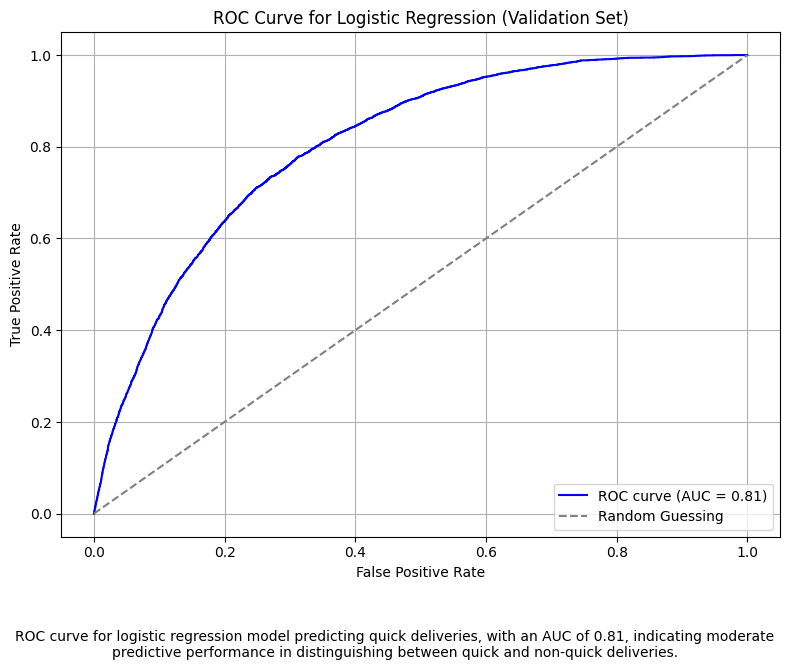

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (quick_delivery = 1)
y_val_pred_proba = lr_model.predict_proba(X_val)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label=f'Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression (Validation Set)')
plt.legend(loc='lower right')
plt.grid()
caption = "ROC curve for logistic regression model predicting quick deliveries, with an AUC of 0.81, indicating moderate predictive performance in distinguishing between quick and non-quick deliveries."
plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=10)


plt.tight_layout()
plt.show()





The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for various thresholds, illustrating the trade-off between sensitivity and the likelihood of false positives. The diagonal line represents random guessing (AUC = 0.5), while the logistic regression model’s ROC curve above this line indicates performance better than random. An AUC of 0.81 means the model has an 81% chance of correctly distinguishing between a randomly chosen quick delivery and a non-quick delivery. This suggests that the model has a strong ability to differentiate between the two classes, performing well in terms of identifying quick deliveries while maintaining a balanced trade-off between sensitivity and specificity. Although the model has improved, there may still be some room for further optimization to achieve even higher accuracy.

 5-fold cross-validation
on  validation set to calculate the AUC and accuracy of each fold

In [37]:
from sklearn.model_selection import cross_val_score

# Calculate AUC using 5-fold cross-validation
auc_scores = cross_val_score(lr_model, X_val, y_val, cv=5, scoring='roc_auc')

# Calculate accuracy using 5-fold cross-validation
accuracy_scores = cross_val_score(lr_model, X_val, y_val, cv=5, scoring='accuracy')


print(f"5-Fold Cross-Validation AUC Scores: {auc_scores}")
print(f"Mean AUC: {auc_scores.mean():.2f}")
print(f"5-Fold Cross-Validation Accuracy Scores: {accuracy_scores}")
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")


5-Fold Cross-Validation AUC Scores: [ 0.79742034  0.80299019  0.81388164  0.81453304  0.8052841 ]
Mean AUC: 0.81
5-Fold Cross-Validation Accuracy Scores: [ 0.86895276  0.86881047  0.866107    0.87334567  0.86808026]
Mean Accuracy: 0.87


These results indicate that the model's ability to distinguish between quick and non-quick deliveries is consistent across different subsets of the validation data, with a mean AUC of 0.81. This suggests a moderate discriminatory power, as it correctly identifies positive cases (quick deliveries) about 81% of the time when compared to random chance. The mean accuracy of 0.87 indicates that the model correctly classifies about 87% of the validation instances, suggesting that the model is performing well at identifying which deliveries are quick and which are not across the entire dataset.


We chose to keep the default threshold of 0.5 for our logistic regression model to maintain a balanced approach between identifying quick and non-quick deliveries. Using 0.5 as the threshold means that the model only classifies a delivery as "quick" if its predicted probability of being quick is at least 50%. This default threshold provides a straightforward interpretation of the model’s output, where predictions are based on the highest likelihood of belonging to one class over the other. Additionally, it avoids introducing potential biases that could result from lowering the threshold without a thorough understanding of the trade-offs. While adjusting the threshold might have increased the True Positive Rate (TPR) and better identified quick deliveries, it could also have led to a higher False Positive Rate (FPR), which would result in more non-quick deliveries being misclassified as quick. By keeping the threshold at 0.5, we aimed to maintain a balanced and interpretable model performance, focusing on the model's ability to predict the most likely outcome in each case.

# Check-in 4

We chose the KNN Algorithm and are using the same binary variable as check-in 3 (quick or slow delivery)

To evaluate model performance and prevent overfitting, split the data into training (80%) and validation (20%).

In [38]:

# Define predictors (X) and response (y)
X = df[['subtotal', 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration','num_distinct_items','max_item_price','total_busy_dashers','total_onshift_dashers']]
y = df['quick_delivery']

# Get Training and Validation set from earlier
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)

Training set size: (140549, 7)
Validation set size: (35138, 7)


Here we implement the KNN algorithm with k=5 neighbors as a starting point. This means the algorithm will consider the 5 closest data points when making a prediction.


In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with a chosen number of neighbors (e.g., k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training set
knn.fit(X_train, y_train)


# Make predictions on the training set
y_train_pred = knn.predict(X_train)


Now we calculate the performance metrics on the training set. The metrics we will use to assess the model with is:


*   Confusion matrix
*   Prediction accuracy
*   Prediction error
*   True positive rate
*   True negative rate
*   F1 score



In [40]:
from sklearn.metrics import f1_score


# Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)
tn, fp, fn, tp = conf_matrix.ravel()
print("Confusion Matrix:\n", conf_matrix)

# Prediction Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Prediction Error
prediction_error = 1 - accuracy
print("Prediction Error:", prediction_error)

# True Positive Rate (TPR) or Sensitivity
tpr = tp / (tp + fn)
print("True Positive Rate (TPR):", tpr)

# True Negative Rate (TNR) or Specificity
tnr = tn / (tn + fp)
print("True Negative Rate (TNR):", tnr)

# F1 Score
f1 = f1_score(y_train, y_train_pred)
print("F1 Score:", f1)


Confusion Matrix:
 [[119776   2434]
 [ 13580   4759]]
Accuracy: 0.8860610890152189
Prediction Error: 0.11393891098478115
True Positive Rate (TPR): 0.259501608594
True Negative Rate (TNR): 0.980083462892
F1 Score: 0.37278709071


Here we plot the ROC curve and the AUC on our validation set to give insight on our model's performance on classifying `quick_delivery`.
 **Interpretation**: This ROC curve provides a visual indication of model performance across different classification thresholds, while the AUC value gives a single metric summarizing overall classification performance. A higher AUC value implies that our model is effectively distinguishing between quick and non-quick deliveries.

Overall, these metrics allow us to assess how well the KNN model generalizes to unseen data, providing valuable insights for further tuning and improvement.


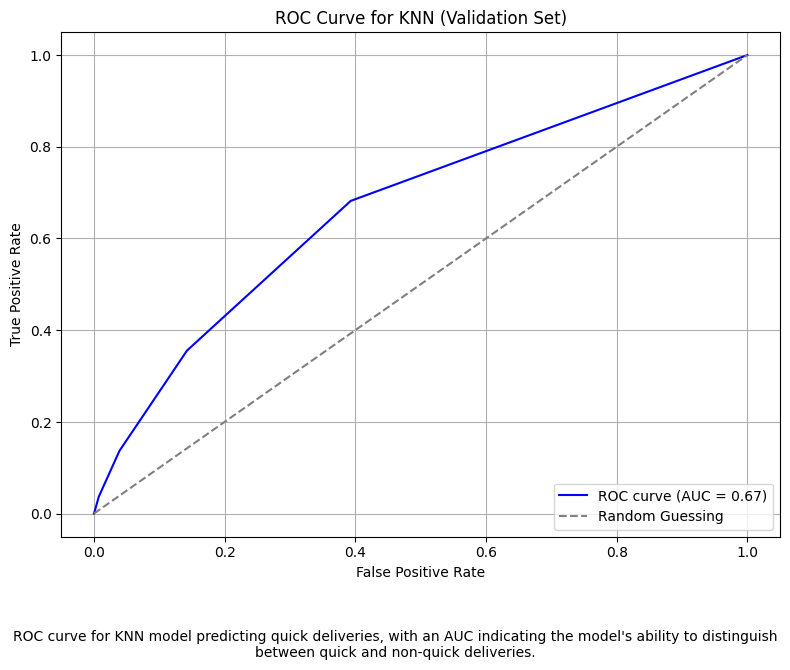

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Get predicted probabilities for the positive class (quick_delivery = 1)
y_val_pred_proba = knn.predict_proba(X_val)[:, 1]

# Calculate ROC curve and AUC on validation set
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN (Validation Set)')
plt.legend(loc='lower right')
plt.grid()
caption = "ROC curve for KNN model predicting quick deliveries, with an AUC indicating the model's ability to distinguish between quick and non-quick deliveries."
plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()


Interpretation of plot:


*   AUC = 0.67. Our model performs better than simply random guessing but it could do a  lot better
*   Shape: The curve bows towards the top-left but not very far. This suggests it has some ability to correclty predict quick deliveries but isn't highly effective.



Here, we perform 5-fold cross-validation on the validation set to further evaluate the model’s performance.


In [42]:

# Perform 5-fold cross-validation for AUC and accuracy
cv = StratifiedKFold(n_splits=5)
auc_scores = cross_val_score(knn, X_val, y_val, cv=cv, scoring='roc_auc')
accuracy_scores = cross_val_score(knn, X_val, y_val, cv=cv, scoring='accuracy')

print(f"5-Fold Cross-Validation AUC Scores: {auc_scores}")
print(f"Mean AUC: {auc_scores.mean():.2f}")
print(f"5-Fold Cross-Validation Accuracy Scores: {accuracy_scores}")
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")

5-Fold Cross-Validation AUC Scores: [ 0.66054957  0.6554718   0.67046651  0.67004996  0.66859993]
Mean AUC: 0.67
5-Fold Cross-Validation Accuracy Scores: [ 0.84931702  0.84945931  0.85216278  0.85199943  0.85285328]
Mean Accuracy: 0.85


# Check-in 5

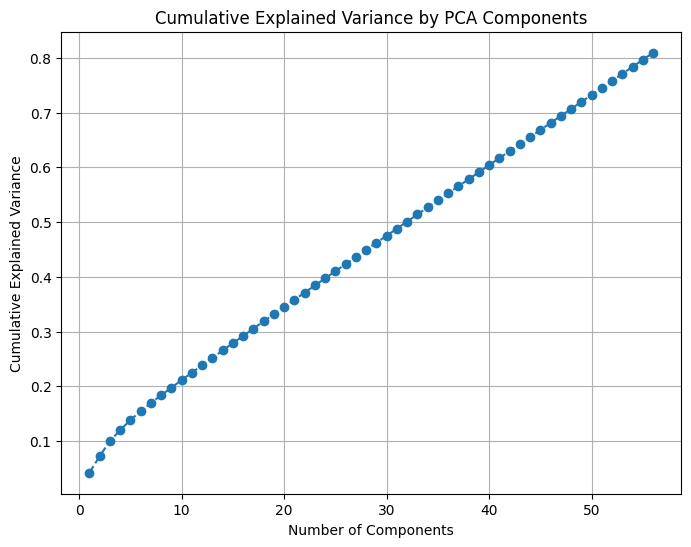

In [43]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
#MJMDT
# Sample allows us to reduce computation cost and to reduce noise
sampled_df = df.sample(n=10000, random_state=42)  # Sample 10,000 rows
# Select only numerical columns for PCA and clustering
numeric_cols = sampled_df.select_dtypes(include=['number'])
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_cols)

# PCA with 80% variance retention
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_scaled)

# Visualize explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

Here PCA is used in our project to reduce the dimensionality of our dataset while retaining at least 80% of its variability, ensuring that the transformed data preserves critical patterns and relationships without being overwhelmed by noise or less-informative features. This approach simplifies the dataset and makes clustering more efficient. PCA focuses on the most significant components to help solve the problem of reliability of distances between points in higher dimensions.

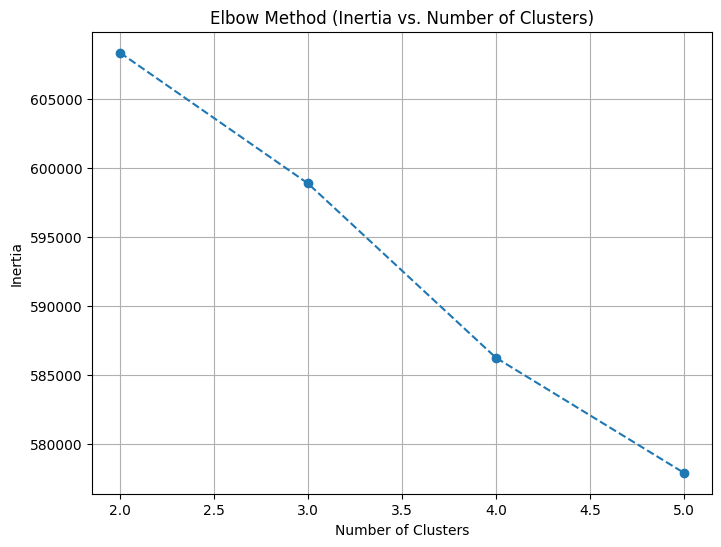

In [44]:
# Clustering: test fewer clusters for efficiency
k_range = range(2, 6)
inertia = []
silhouette_scores = []

# Iterate and Calculate metrics
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, clusters))

  # Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method (Inertia vs. Number of Clusters)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

Here, the plot shows a fairly linear decrease without a clear elbow, suggesting that clustering quality does not significantly change with the number of clusters tested (2 to 5)

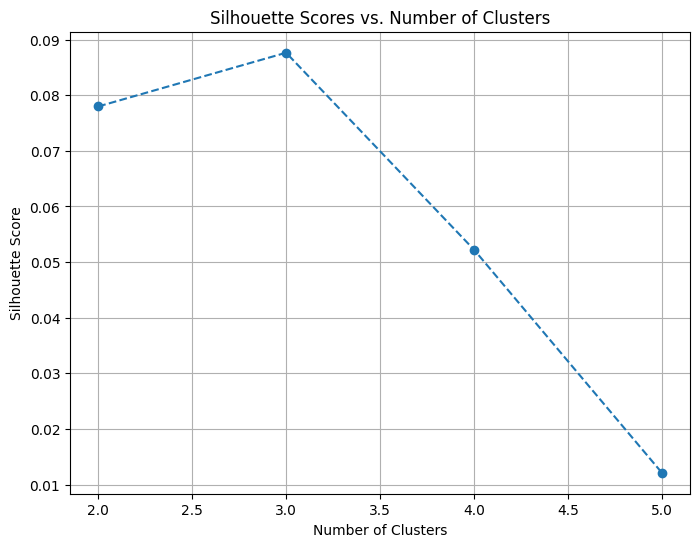

In [45]:
# Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

Here, the Silhouette Score steadily increases from 2 to 5 clusters, suggesting that higher numbers of clusters may provide better-defined groupings within the data. However, since the scores are relatively low overall, it may indicate that the clustering structure is not strongly defined

Optimal number of clusters: 3


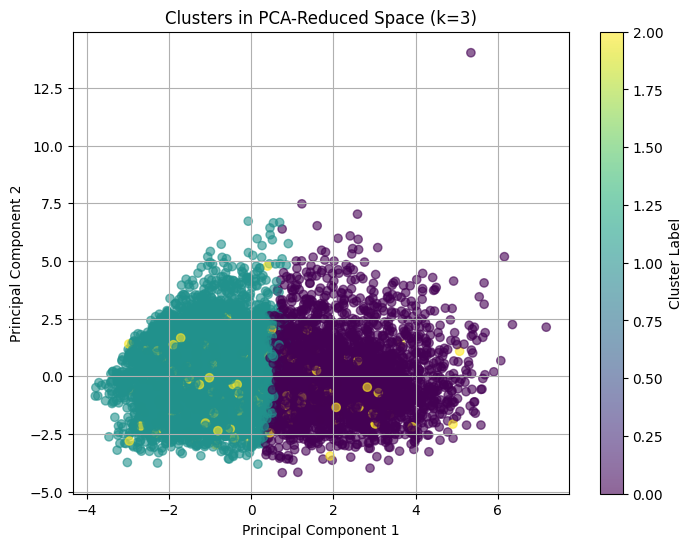

Silhouette Score for final clustering: 0.09


In [46]:
# Final Clustering with Optimal k
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal number of clusters: {optimal_k}")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
final_clusters = kmeans_final.fit_predict(X_pca)

# Visualize final clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_clusters, cmap='viridis', alpha=0.6)
plt.title(f'Clusters in PCA-Reduced Space (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

# Quantitative Metric for Final Clustering
silhouette_avg = silhouette_score(X_pca, final_clusters)
print(f'Silhouette Score for final clustering: {silhouette_avg:.2f}')


This scatter plot visualizes the final clustering result in a reduced 2D space using the first two principal components after applying PCA. Here, the optimal number of clusters is determined to be 5 based on the highest Silhouette Score. These 5 primary clusters represent a unique subset of data points with shared traits.

# Check-in 6

In [47]:
# Imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

# Data preparation
print("### Data Preparation ###")
X = df[['subtotal', 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration',
        'num_distinct_items', 'max_item_price', 'total_busy_dashers', 'total_onshift_dashers']].values
y = df['quick_delivery'].values  # Classification target (binary)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


### Data Preparation ###


Here, we normallize the features to ensure all input values have the same scale, and the dataset is split into training and test sets to prevent overfitting.

In [48]:
print("\n### Define the Neural Network ###")

class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model
input_size = X_train_tensor.shape[1]
model = NeuralNetwork(input_size)

print(f"Model architecture:\n{model}")



### Define the Neural Network ###
Model architecture:
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


Here, we define a neural network with two hidden layers. Each layer uses the ReLU activation function to introduce non-linearity, followed by a Sigmoid activation at the output layer for binary classification.


In [49]:
print("\n### Training the Model ###")

# Loss function and optimizer
loss_function = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()  # Set to training mode
    total_loss = 0

    for X_batch, y_batch in train_loader:
        # Forward pass
        outputs = model(X_batch).squeeze()
        loss = loss_function(outputs, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print loss for the epoch
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")



### Training the Model ###
Epoch [1/20], Loss: 0.3158
Epoch [2/20], Loss: 0.3096
Epoch [3/20], Loss: 0.3084
Epoch [4/20], Loss: 0.3080
Epoch [5/20], Loss: 0.3077
Epoch [6/20], Loss: 0.3072
Epoch [7/20], Loss: 0.3070
Epoch [8/20], Loss: 0.3067
Epoch [9/20], Loss: 0.3065
Epoch [10/20], Loss: 0.3064
Epoch [11/20], Loss: 0.3062
Epoch [12/20], Loss: 0.3062
Epoch [13/20], Loss: 0.3062
Epoch [14/20], Loss: 0.3060
Epoch [15/20], Loss: 0.3059
Epoch [16/20], Loss: 0.3057
Epoch [17/20], Loss: 0.3055
Epoch [18/20], Loss: 0.3057
Epoch [19/20], Loss: 0.3053
Epoch [20/20], Loss: 0.3054


Here, we train the model over 20 epochs using Binary Cross-Entropy Loss since we are doing binary classification and the Adam optimizer. After the final training epoch the average loss was 0.3056. Hyperparameters for the learning rate (0.001) and batch size (32) were chosen after experimentation. A small learning rate ensures stable convergence, while the batch size balances speed with stability.

In [50]:
print("\n### Evaluating the Model ###")

# Evaluation mode
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).squeeze()
    y_pred_classes = (y_pred > 0.5).int()  # Classification threshold

# Metrics
accuracy = accuracy_score(y_test_tensor, y_pred_classes)
roc_auc = roc_auc_score(y_test_tensor, y_pred.numpy())

print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test ROC AUC: {roc_auc:.2f}")



### Evaluating the Model ###
Test Accuracy: 0.87
Test ROC AUC: 0.82


Here, the model was fairly accurate in its classification of the test data and the ROC AUC of 0.81 shows it generally had a good abiliity to make the distinguishments between classes. The metrics of accuracy and ROC-AUC were used to evaluate the model on the test set because accuracy tells us how well the model performs overal and ROC-AUC gives a deeper understanding of the handling of imbalanced data or misclassification.

In [51]:
print("\n### Hyperparameter Tuning ###")

# Experimenting with learning rates
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]

for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f"Training with learning rate={lr}, batch_size={batch_size}")
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Repeat training loop
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)



### Hyperparameter Tuning ###
Training with learning rate=0.001, batch_size=16
Training with learning rate=0.001, batch_size=32
Training with learning rate=0.001, batch_size=64
Training with learning rate=0.01, batch_size=16
Training with learning rate=0.01, batch_size=32
Training with learning rate=0.01, batch_size=64
Training with learning rate=0.1, batch_size=16
Training with learning rate=0.1, batch_size=32
Training with learning rate=0.1, batch_size=64
